# Crossing Angles and Hourglass Effect

0. [Calculation](#chapter0)
1. [Solving integral wrt s](#chapter1)
2. [Varying Parameters](#chapter2)\
    2.1 [$\beta^*$](#chapter2.1)\
    2.2 [$\phi_c$](#chapter2.2)\
    2.3 [$\epsilon_x$](#chapter2.3)\
    2.4 [$\epsilon_y$](#chapter2.4)\
    2.5 [$\sigma_z$](#chapter2.5)
3. [Incorporation of $s^*$](#chapter3)
4. [Incorporation of $\vec{\beta}^*$](#chapter4)

## 0.  Calculation <a name="chapter0"></a>

### Change of coordinates:
$x_1 = x\cos\frac{\phi}{2} - s\sin\frac{\phi}{2}; s_1 = s\cos\frac{\phi}{2} + x\sin\frac{\phi}{2}$\
$x_2 = x\cos\frac{\phi}{2} + s\sin\frac{\phi}{2}; s_2 = s\cos\frac{\phi}{2} - x\sin\frac{\phi}{2}$

$L_0 = \frac{fN_1N_2}{4\pi\sigma_{0x}\sigma_{0y}}$\
where $\sigma_{0i} = \sqrt{\epsilon_i\beta}$\
and $\beta(s) = \beta^*(1 + (\frac{s}{\beta^*})^2)$\
where $\beta^* = \beta(s = 0)$

Relativistic Factor:\
$K = 2\cos^2\frac{\phi}{2}$

### Luminosity:
$L = 2\cos^2\frac{\phi}{2}N_1N_2f
\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}
\rho_1(x_1, y_1, s_1, s_{01})\rho_2(x_2, y_2, s_2, s_{02})$ dxdydsds_0

$ = \cos^2\frac{\phi}{2}N_1N_2f
\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}
\frac{1}{4\pi^3\beta^2\epsilon_x\epsilon_y\sigma_z^2}
\exp(-\frac{x_1^2}{2\sigma_x^2})\exp(-\frac{y_1^2}{2\sigma_y^2})\exp(-\frac{(s_1 - s_0)^2}{2\sigma_z^2}) 
\exp(-\frac{x_2^2}{2\sigma_x^2})\exp(-\frac{y_2^2}{2\sigma_y^2})\exp(-\frac{(s_2 + s_0)^2}{2\sigma_z^2})$
dxdydsds_0

Integrate wrt y:

$ = \frac{\cos^2\frac{\phi}{2}N_1N_2f}{4\pi^{5/2}\sigma_x^2\sigma_y\sigma_z^2}
\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}
\exp(-\frac{x_1^2 + x_2^2}{2\sigma_x^2})\exp(-\frac{s_1^2 + s_2^2 + 2s_0^2 + 2s_0(s_2 - s_1)}{2\sigma_z^2})$ 
dxdsds_0

and s0:
$ = \frac{\cos^2\frac{\phi}{2}N_1N_2f}{4\pi^2\sigma_x^2\sigma_y\sigma_z}
\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}
\exp(-\frac{x_1^2 + x_2^2}{2\sigma_x^2})\exp(-\frac{s_1^2 + s_2^2 + 2(s_2 - s_1)^2}{2\sigma_z^2}) $
dxds

$= \cos^2(\frac{\phi}{2})fN_1N_2\int_{-\infty}^{\infty}
\frac{1}{4\pi^2\sigma_x^2\sigma_y\sigma_z}
$exp$(-(\frac{ s^2\sin^2(\frac{\phi}{2})) + x^2\cos^2(\frac{\phi}{2}) }{\sigma_x^2})) 
$exp$(-(\frac{ s^2\cos^2(\frac{\phi}{2}) }{\sigma_z^2}))$ dxds

$= \cos^2(\frac{\phi}{2})fN_1N_2\int_{-\infty}^{\infty}
\frac{1}{4\pi^2\sigma_x^2\sigma_y\sigma_z}
$exp$(-x^2(\frac{ \cos^2(\frac{\phi}{2}) }{\sigma_x^2}))
$exp$(-s^2(\frac{ \sin^2(\frac{\phi}{2}) }{\sigma_x^2} + \frac{\cos^2(\frac{\phi}{2})}{\sigma_z^2} ))$ dxds

Integrate wrt x:

$= \cos^2(\frac{\phi}{2})fN_1N_2\int_{-\infty}^{\infty}
\frac{1}{4\pi^{1.5}\sigma_x^2\sigma_y\sigma_z
\frac{ \cos(\frac{\phi}{2}) }{\sigma_x}}
$exp$(-s^2(\frac{ \sin^2(\frac{\phi}{2}) }{\sigma_x^2} + \frac{\cos^2(\frac{\phi}{2})}{\sigma_z^2} ))$ ds

$= \cos(\frac{\phi}{2})fN_1N_2\int_{-\infty}^{\infty}
\frac{1}{4\pi^{1.5}\sigma_x\sigma_y\sigma_z}
$exp$(-s^2(\frac{ \sin^2(\frac{\phi}{2}) }{\sigma_x^2} + \frac{\cos^2(\frac{\phi}{2})}{\sigma_z^2} ))$ ds

## 1. Solving integral wrt s: <a name="chapter1"></a>

In [1]:
# Libraries
import time
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate

In [13]:
#Integrand to evaluate wrt s
# Parameters given: f, N1, N2, beta_star, ex, ey, sz, phi
# This is the new version with the correction 
def Integrand(s, f, N1, N2, bs, ex, ey, sz, phi):
    beta = bs*(1 + (s/bs)**2)
    sx = np.sqrt(ex*beta)
    sy = np.sqrt(ey*beta)
    
    denom = 4*np.pi**1.5 * sx*sy*sz
    num = np.exp(-s**2*(np.sin(phi/2)**2/sx**2 + np.cos(phi/2)**2/sz**2))
    
    #Normalization depends on ex and beta*
    return f*N1*N2*np.cos(phi/2) * num/denom

#Old version
def Integrand2(s, f, N1, N2, bs, ex, ey, sz, phi):
    beta = bs*(1 + (s/bs)**2)
    sx = np.sqrt(ex*beta)
    sy = np.sqrt(ey*beta)
    
    denom = 4*np.pi**1.5 * sx**2*sy*sz * np.sqrt(np.cos(phi/2)**2/sx**2 + np.sin(phi/2)**2/sz**2)
    num = np.exp(-s**2*(np.sin(phi/2)**2/sx**2 + np.cos(phi/2)**2/sz**2))# + s**2*np.sin(phi/2)**2/sz**2)
    
    #Normalization depends on ex and beta*
    return f*N1*N2*np.cos(phi/2)**2 * num/denom

In [14]:
# Initial conditions from experiment
# beta*, ex, ey, sz, phi are given to determine luminosity
f = 1
N1 = 1
N2 = 1
beta_star = .2 #m
ex = 1E-7 #microns
ey = 1E-7 #microns
sx = np.sqrt(ex*beta_star)
sy = np.sqrt(ey*beta_star)
print(sx)
sz = .2 #m
phi = 2E-3 #rad
theta = sz/sx*phi/2
print(theta)

# Bounds
neg_inf, pos_inf = -np.inf, np.inf
low_bound, hi_bound = -.1, .1 #10 cm

0.0001414213562373095
1.4142135623730951


In [17]:
# Using Scipy
Luminosity_int = (lambda f, N1, N2, bs, ex, ey, sz, phi, a, b: 
                        integrate.quad(Integrand, a, b, args = (f, N1, N2, bs, ex, ey, sz, phi))[0])
Luminosity_int_old = (lambda f, N1, N2, bs, ex, ey, sz, phi, a, b: 
                        integrate.quad(Integrand2, a, b, args = (f, N1, N2, bs, ex, ey, sz, phi))[0])

res = Luminosity_int(f, N1, N2, beta_star, ex, ey, sz, phi, neg_inf, pos_inf)
res2 = Luminosity_int_old(f, N1, N2, beta_star, ex, ey, sz, phi, neg_inf, pos_inf)
print("Luminosity:", res, res2)

Luminosity: 2227612.7653371557 2227612.7653364893


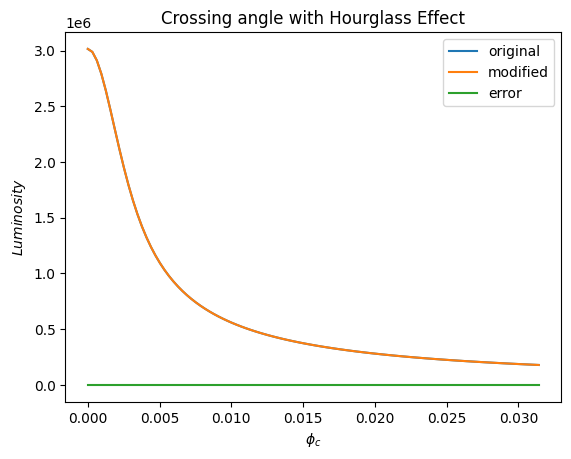

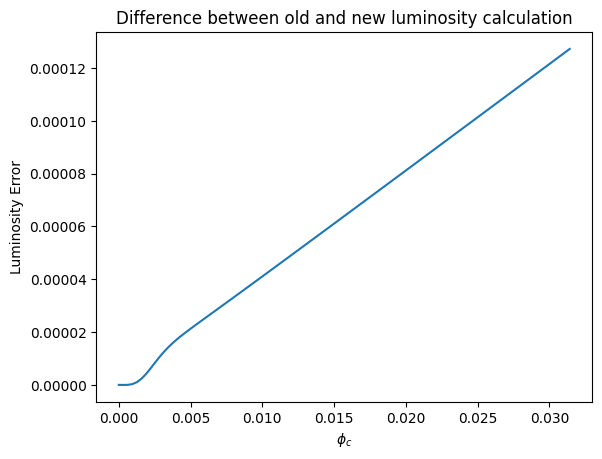

In [21]:
N = 100
Phi = np.linspace(0, np.pi/100, N + 1)
Luminosities = np.zeros(N + 1)
Luminosities_old = np.zeros(N + 1)
Error = np.zeros(N + 1)
for i, p in enumerate(Phi):
    Luminosities[i] = Luminosity_int(f, N1, N2, beta_star, ex, ey, sz, p, neg_inf, pos_inf)
    Luminosities_old[i] = Luminosity_int_old(f, N1, N2, beta_star, ex, ey, sz, p, neg_inf, pos_inf)
Error = Luminosities2 - Luminosities
plt.plot(Phi, Luminosities, label = "original")
plt.plot(Phi, Luminosities_old, label = "modified")
plt.plot(Phi, Error, label = "error")
plt.title(r"Crossing angle with Hourglass Effect")
plt.ylabel(r"$Luminosity$")
plt.xlabel(r"$\phi_c$")
plt.legend()
plt.show()

plt.plot(Phi, Error)
plt.title(r"Difference between old and new luminosity calculation")
plt.ylabel("Luminosity Error")
plt.xlabel(r"$\phi_c$")
plt.show()

Difference between old and new calculation is small but not 0. \
Error is also small for small angles due to the $x^2\sin^2(\frac{\phi}{2})$ term (which is very small) not present in the new calculation.

### Luminosity from Paper by Peng

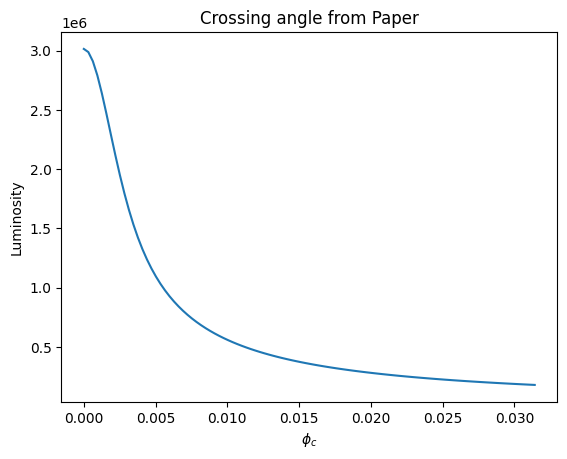

In [22]:
def Lum_peng(s, f, N1, N2, bs, ex, ey, sz, phi):
    sx0 = np.sqrt(ex*bs)
    sy0 = np.sqrt(ey*bs)
    Sx = (1 + s**2*np.cos(phi/2)**2/bs**2)*sx0**2
    Sy = (1 + s**2*np.cos(phi/2)**2/bs**2)*sy0**2
    denom_1 = 4*np.pi**1.5*sz
    denom_2 = np.sqrt(Sx)*np.sqrt(Sy)
    num = np.exp(s**2*(-(1 + np.cos(phi))/(2*sz**2) + (np.cos(phi) - 1)/(2*Sx)))
    return np.cos(phi/2)**2*f*N1*N2*num/denom_1/denom_2

Lum_peng_int = lambda f, N1, N2, bs, ex, ey, sz, phi, a, b: integrate.quad(Lum_peng, a, b, 
                                                               args = (f, N1, N2, bs, ex, ey, sz, phi))[0]

Luminosities_peng = np.zeros(N + 1)
for i, p in enumerate(Phi):
    Luminosities_peng[i] = Lum_peng_int(f, N1, N2, beta_star, ex, ey, sz, p, neg_inf, pos_inf)
plt.plot(Phi, Luminosities_peng)
plt.title("Crossing angle from Paper")
plt.ylabel("Luminosity")
plt.xlabel(r"$\phi_c$")
plt.show()

Piwinski angle: 1.4142135623730951 radians


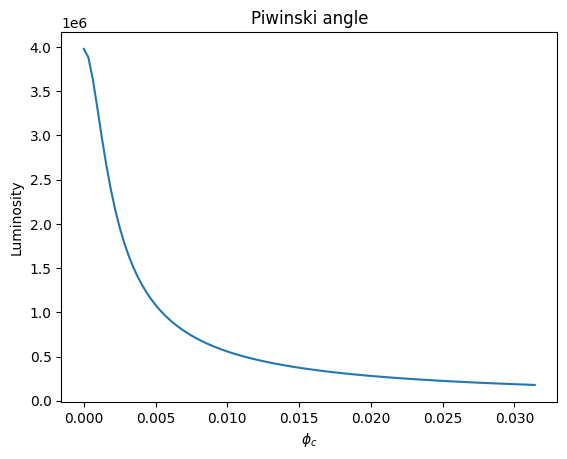

In [24]:
#Piwinski angle Approximation
# theta = sz/sx*phi/2
print("Piwinski angle:", theta, "radians")
L0 = f*N1*N2/(4*np.pi*sx*sy)
Theta = sz/sx*Phi/2
Lum_piw = L0/np.sqrt(1 + Theta**2)
plt.plot(Phi, Lum_piw)
plt.title("Piwinski angle")
plt.ylabel("Luminosity")
plt.xlabel(r"$\phi_c$")
plt.show()

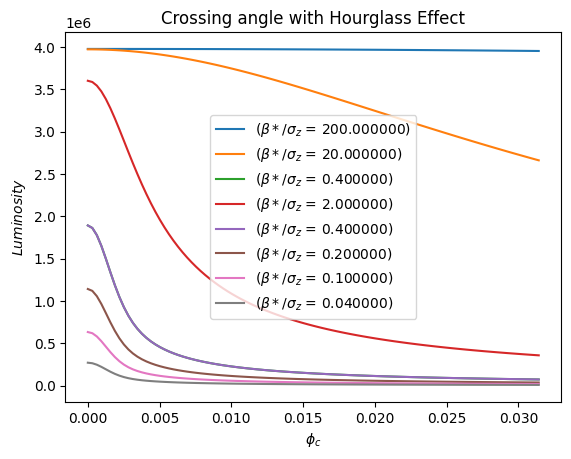

In [25]:
#Beta star constant
N = 100
Phi = np.linspace(0, np.pi/100, N + 1)
Luminosities = np.zeros(N + 1)
Sigma_z = np.array([.001, .01, .5, .1, .5, 1, 2, 5])
for s_z in Sigma_z:
    for i, p in enumerate(Phi):
        Luminosities[i] = Luminosity_int(f, N1, N2, beta_star, ex, ey, s_z, p, neg_inf, pos_inf)
    plt.plot(Phi, Luminosities, label = r"($\beta*/\sigma_z$ = %f)"%(beta_star/s_z))
plt.title(r"Crossing angle with Hourglass Effect")
plt.legend()
plt.ylabel(r"$Luminosity$")
plt.xlabel(r"$\phi_c$")
plt.show()

- As $\phi$ increases, the Luminosity will always go down.
- As $\beta^*/\sigma_z$ increases (hourglass factor), the maximum of the curve increases and rate that the curve decreases also decreases
- Asymtotic behavior of decreasing $\sigma_z$

## 2. Luminosity at a specific region with specific parameters <a name="chapter2"></a>
- $L_1$ is the integral evaluated between some bounds (s = -10 cm to s = 10 cm)
- $L_0$ is the integral evaluated over all of space
- Want to maximize integral between bounds $L_1$ while minimizing integral outside bounds ($L_0 - L_1$)

### 2.1 Varying $\beta^*$ <a name="chapter2.1"></a>

f, N1, N2 | bs, ex, ey, sz, phi, piwinski angle | low_bound, hi_bound, neg_inf, pos_inf:
1 1 1 | 0.5 1e-07 1e-07 0.2 0.002 1.4142135623730951 | -0.1 0.1 -inf inf


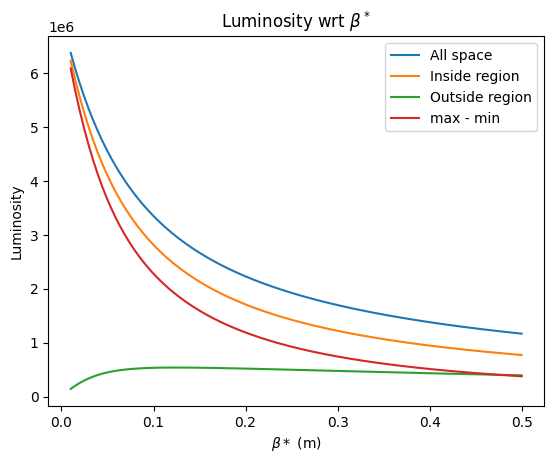

In [26]:
# Plot both with respect to beta_star
N = 200
Beta_star = np.linspace(.01, .5, N + 1)
L_1_plot = np.zeros(N + 1)
L_0_plot = np.zeros(N + 1)

for i, bs in enumerate(Beta_star):
    #integral from low_bound to hi_bound
    L_1_plot[i] = Luminosity_int(f, N1, N2, bs, ex, ey, sz, phi, low_bound, hi_bound)
    #integral from -inf to inf
    L_0_plot[i] = Luminosity_int(f, N1, N2, bs, ex, ey, sz, phi, neg_inf, pos_inf)

print("f, N1, N2 | bs, ex, ey, sz, phi, piwinski angle | low_bound, hi_bound, neg_inf, pos_inf:")
print(f, N1, N2, "|" , bs, ex, ey, sz, phi, theta, "|", low_bound, hi_bound, neg_inf, pos_inf)

plt.plot(Beta_star, L_0_plot, label = "All space")
plt.plot(Beta_star, L_1_plot, label = "Inside region")
plt.plot(Beta_star, L_0_plot - L_1_plot, label = "Outside region")

curve_beta_star = L_1_plot-(L_0_plot - L_1_plot) #maximize - minimize
plt.plot(Beta_star, curve_beta_star, label = "max - min")
plt.title(r"Luminosity wrt $\beta^*$")
plt.ylabel("Luminosity")
plt.xlabel(r"$\beta*$ (m)")
#plt.xscale("log")
#plt.yscale("log")
plt.legend()
plt.show()

In [29]:
beta_star_max = Beta_star[np.argmax(curve_beta_star)]
print("Beta star for max Luminosity:", beta_star_max)

Beta star for max Luminosity: 0.01


### 2.2 Varying $\phi_c$ <a name="chapter2.2"></a>

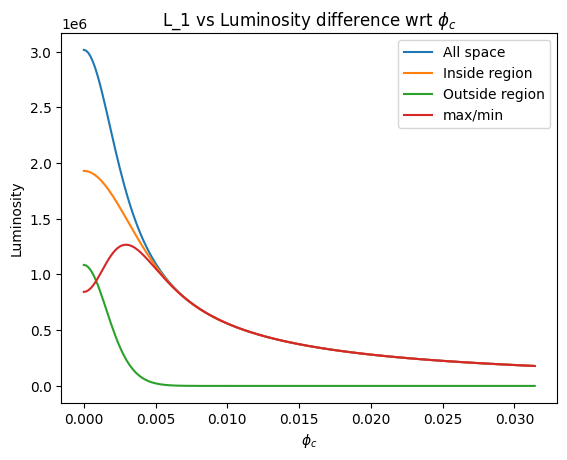

In [30]:
# Plot with respect to Phi
Phi = np.linspace(0, np.pi/100, N + 1)
L_1_plot2 = np.zeros(N + 1)
L_0_plot2 = np.zeros(N + 1)
for i, p in enumerate(Phi):
    L_1_plot2[i] = Luminosity_int(f, N1, N2, beta_star, ex, ey, sz, p, low_bound, hi_bound)
    L_0_plot2[i] = Luminosity_int(f, N1, N2, beta_star, ex, ey, sz, p, neg_inf, pos_inf)

plt.plot(Phi, L_0_plot2, label = "All space")
plt.plot(Phi, L_1_plot2, label = "Inside region")
plt.plot(Phi, L_0_plot2 - L_1_plot2, label = "Outside region")

curve_phi = L_1_plot2 - (L_0_plot2 - L_1_plot2)
plt.plot(Phi, curve_phi, label = "max/min")
plt.title(r"L_1 vs Luminosity difference wrt $\phi_c$")
plt.ylabel("Luminosity")
plt.xlabel(r"$\phi_c$")
plt.legend()
plt.show()

In [31]:
phi_max = Phi[np.argmax(curve_phi)]
print("Phi for max Luminosity:", phi_max)

Phi for max Luminosity: 0.002984513020910304


### 2.3 Varying $\epsilon_x$ <a name="chapter2.3"></a>

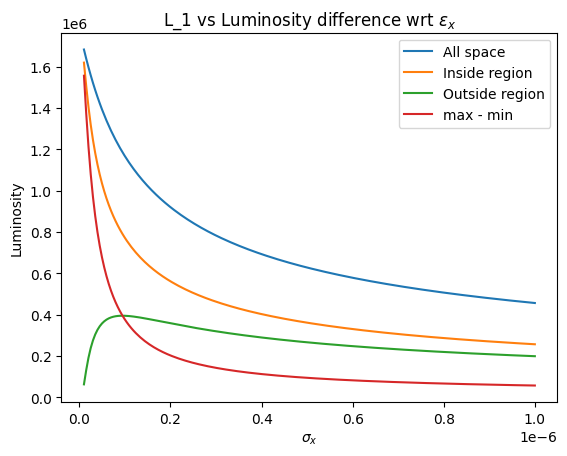

In [32]:
# Plot with respect to eps_x
Eps_x = np.linspace(1E-8, 1E-6, N + 1) #m
L_1_plot3 = np.zeros(N + 1)
L_0_plot3 = np.zeros(N + 1)
for i, e_x in enumerate(Eps_x):
    L_1_plot3[i] = Luminosity_int(f, N1, N2, bs, e_x, ey, sz, phi, low_bound, hi_bound)
    L_0_plot3[i] = Luminosity_int(f, N1, N2, bs, e_x, ey, sz, phi, neg_inf, pos_inf)

plt.plot(Eps_x, L_0_plot3, label = "All space")
plt.plot(Eps_x, L_1_plot3, label = "Inside region")
plt.plot(Eps_x, L_0_plot3 - L_1_plot3, label = "Outside region")

curve_eps_x = L_1_plot3 - (L_0_plot3 - L_1_plot3)
plt.plot(Eps_x, curve_eps_x, label = "max - min")
plt.title(r"L_1 vs Luminosity difference wrt $\epsilon_x$")
plt.ylabel("Luminosity")
plt.xlabel(r"$\sigma_x$")
plt.legend()
plt.show()

In [33]:
eps_x_max = Eps_x[np.argmax(curve_eps_x)]
print("epsilon_x for max Luminosity:", eps_x_max)

epsilon_x for max Luminosity: 1e-08


### 2.4 Varying $\epsilon_y$ <a name="chapter2.4"></a>

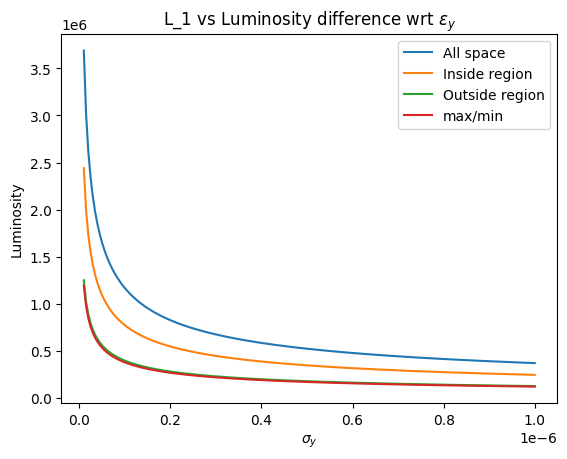

In [34]:
# Plot with respect to eps_y
Eps_y = np.linspace(1E-8, 1E-6, N + 1) #m
L_1_plot4 = np.zeros(N + 1)
L_0_plot4 = np.zeros(N + 1)
for i, e_y in enumerate(Eps_y):
    L_1_plot4[i] = Luminosity_int(f, N1, N2, bs, ex, e_y, sz, phi, low_bound, hi_bound)
    L_0_plot4[i] = Luminosity_int(f, N1, N2, bs, ex, e_y, sz, phi, neg_inf, pos_inf)

plt.plot(Eps_y, L_0_plot4, label = "All space")
plt.plot(Eps_y, L_1_plot4, label = "Inside region")
plt.plot(Eps_y, L_0_plot4 - L_1_plot4, label = "Outside region")

curve_eps_y = L_1_plot4 - (L_0_plot4 - L_1_plot4)
plt.plot(Eps_y, curve_eps_y, label = "max/min")
plt.title(r"L_1 vs Luminosity difference wrt $\epsilon_y$")
plt.ylabel("Luminosity")
plt.xlabel(r"$\sigma_y$")
#plt.yscale("log")
plt.legend()
plt.show()

In [35]:
eps_y_max = Eps_y[np.argmax(curve_eps_y)]
print("epsilon_y for max Luminosity:", eps_y_max)

epsilon_y for max Luminosity: 1e-08


### 2.5 Varying $\sigma_z$ <a name="chapter2.5"></a>

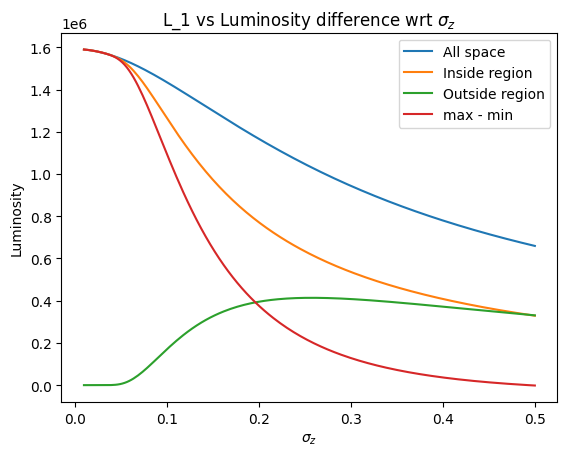

In [36]:
# Plot with respect to sigma_z
Sigma_z = np.linspace(.01, .5, N + 1)
L_1_plot5 = np.zeros(N + 1)
L_0_plot5 = np.zeros(N + 1)
for i, s_z in enumerate(Sigma_z):
    L_1_plot5[i] = Luminosity_int(f, N1, N2, bs, ex, ey, s_z, phi, low_bound, hi_bound)
    L_0_plot5[i] = Luminosity_int(f, N1, N2, bs, ex, ey, s_z, phi, neg_inf, pos_inf)

plt.plot(Sigma_z, L_0_plot5, label = "All space")
plt.plot(Sigma_z, L_1_plot5, label = "Inside region")
plt.plot(Sigma_z, L_0_plot5 - L_1_plot5, label = "Outside region")

curve_sigma_z = L_1_plot5 - (L_0_plot5 - L_1_plot5)
plt.plot(Sigma_z, curve_sigma_z, label = "max - min")
plt.title(r"L_1 vs Luminosity difference wrt $\sigma_z$")
plt.ylabel("Luminosity")
plt.xlabel(r"$\sigma_z$")
plt.legend()
plt.show()

In [37]:
eps_z_max = Sigma_z[np.argmax(curve_sigma_z)]
print("epsilon_z for max Luminosity:", eps_z_max)

epsilon_z for max Luminosity: 0.01


## 3. s-offset ($\vec{s}^*$) <a name="chapter3"></a>

Integrate integrand but now $\vec{s}^* \neq$ 0 at IP:\
$\beta(s) = \beta^*(1 + (\frac{(s - s^*)}{\beta^*})^2)$

This also means that $\beta(s)$ will be different for x and y as well:\
$\beta_i(s) = \beta^*(1 + (\frac{(s - s_i^*)}{\beta^*})^2); i = x, y$

Combine with previous result:\
$L = \cos^2(\frac{\phi}{2})fN_1N_2\int_{-\infty}^{\infty}
\frac{1}{4\pi^{1.5}\sigma_x^2\sigma_y\sigma_z
\sqrt{\frac{ \cos^2(\frac{\phi}{2}) }{\sigma_x^2} + \frac{\sin^2(\frac{\phi}{2})}{\sigma_z^2}} }
$exp$(-s^2(\frac{ \sin^2(\frac{\phi}{2}) }{\sigma_x^2} + \frac{\cos^2(\frac{\phi}{2})}{\sigma_z^2} ))$ ds

Where $\sigma_i(s) = \sqrt{\epsilon_i\beta_i(s)}$

In [38]:
#Integrand with s* to evaluate wrt s
# Parameters given: f, N1, N2, s*_x, s*_y, beta_star, ex, ey, sz, phi
def Integrand_s_star(s, f, N1, N2, ssx, ssy, bs, ex, ey, sz, phi):
    beta_x = bs*(1 + ((s - ssx)/bs)**2)
    beta_y = bs*(1 + ((s - ssy)/bs)**2)
    sx = np.sqrt(ex*beta_x)
    sy = np.sqrt(ey*beta_y)
    
    denom = 4*np.pi**1.5 * sx*sy*sz
    num = np.exp(-s**2*(np.sin(phi/2)**2/sx**2 + np.cos(phi/2)**2/sz**2))
    
    #Normalization depends on ex and beta*
    return f*N1*N2*np.cos(phi/2) * num/denom


In [39]:
# s* initial conditions
# if want to change other parameters, go to sec 1
s_star_x = 0
s_star_y = 0

In [40]:
# Using Scipy
Luminosity_int_s_star = (lambda f, N1, N2, ssx, ssy, bs, ex, ey, sz, phi, a, b: 
                        integrate.quad(Integrand_s_star, a, b, 
                        args = (f, N1, N2, ssx, ssy, bs, ex, ey, sz, phi))[0])
L0_s_star = Luminosity_int_s_star(f, N1, N2, s_star_x, s_star_y, beta_star, ex, ey, sz, phi, neg_inf, pos_inf)
L1_s_star = Luminosity_int_s_star(f, N1, N2, s_star_x, s_star_y, beta_star, ex, ey, sz, phi, low_bound, hi_bound)

print("Luminosity for (s_star_x, s_star_y) = (%f, %f):"%(s_star_x, s_star_y), L0_s_star)
print("Luminosity for (s_star_x, s_star_y) = (%f, %f):"%(s_star_x, s_star_y), L1_s_star)

Luminosity for (s_star_x, s_star_y) = (0.000000, 0.000000): 2227612.7653371557
Luminosity for (s_star_x, s_star_y) = (0.000000, 0.000000): 1708029.7250030076


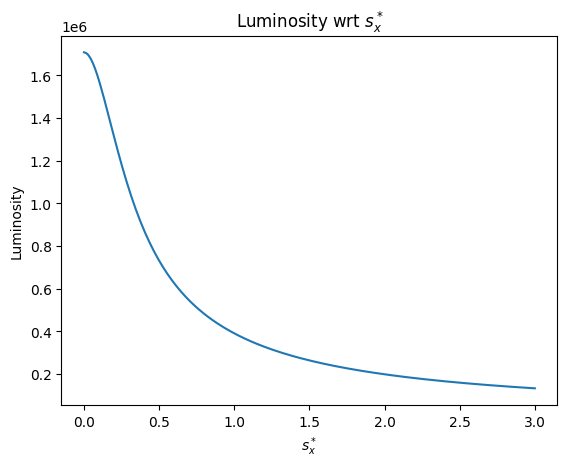

In [41]:
S_star_x = np.linspace(0, 3, N + 1)
Luminosities_s_star_x = np.zeros(N + 1)
for i, ssx in enumerate(S_star_x):
    Luminosities_s_star_x[i] = Luminosity_int_s_star(f, N1, N2, ssx, s_star_y, beta_star, 
                                                     ex, ey, sz, phi, low_bound, hi_bound)
plt.plot(S_star_x, Luminosities_s_star_x)
plt.title(r"Luminosity wrt $s_x^*$")
plt.ylabel("Luminosity")
plt.xlabel(r"$s_x^*$")
plt.show()

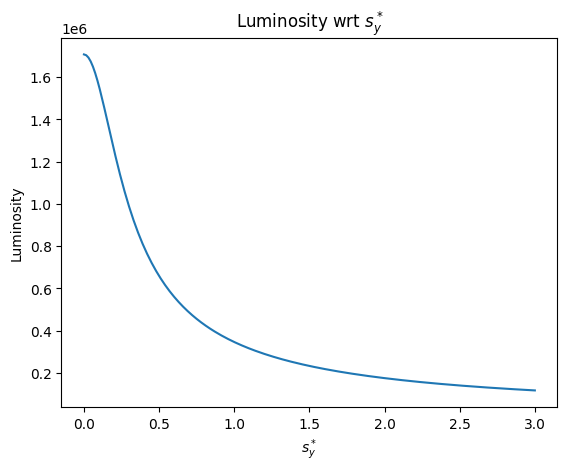

In [42]:
S_star_y = np.linspace(0, 3, N + 1)
Luminosities_s_star_y = np.zeros(N + 1)
for i, ssy in enumerate(S_star_y):
    Luminosities_s_star_y[i] = Luminosity_int_s_star(f, N1, N2, s_star_x, ssy, beta_star, 
                                                     ex, ey, sz, phi, low_bound, hi_bound)
plt.plot(S_star_y, Luminosities_s_star_y)
plt.title(r"Luminosity wrt $s_y^*$")
plt.ylabel("Luminosity")
plt.xlabel(r"$s_y^*$")
plt.show()

## 4. $\vec{\beta}^*$ <a name="chapter4"></a>
$\beta^*$ is split into two parameters: $\beta^*_x$ and $\beta^*_y$

$\rightarrow \beta_i(s) = \beta^*_i(1 + (\frac{(s - s_i^*)}{\beta^*_i})^2); i = x, y$

Combine with previous result:\
$L = \cos^2(\frac{\phi}{2})fN_1N_2\int_{-\infty}^{\infty}
\frac{1}{4\pi^{1.5}\sigma_x^2\sigma_y\sigma_z
\sqrt{\frac{ \cos^2(\frac{\phi}{2}) }{\sigma_x^2} + \frac{\sin^2(\frac{\phi}{2})}{\sigma_z^2}} }
$exp$(-s^2(\frac{ \sin^2(\frac{\phi}{2}) }{\sigma_x^2} + \frac{\cos^2(\frac{\phi}{2})}{\sigma_z^2} ))$ ds

Where $\sigma_i(s) = \sqrt{\epsilon_i\beta_i(s)}$

In [43]:
#Integrand with b*_i to evaluate wrt s
# Parameters given: f, N1, N2, s*_x, s*_y, beta_star_x, beta_star_y, ex, ey, sz, phi
def Integrand_b_star(s, f, N1, N2, ssx, ssy, bsx, bsy, ex, ey, sz, phi):
    beta_x = bsx*(1 + ((s - ssx)/bsx)**2)
    beta_y = bsy*(1 + ((s - ssy)/bsy)**2)
    sx = np.sqrt(ex*beta_x)
    sy = np.sqrt(ey*beta_y)
    
    denom = 4*np.pi**1.5 * sx*sy*sz
    num = np.exp(-s**2*(np.sin(phi/2)**2/sx**2 + np.cos(phi/2)**2/sz**2))
    
    #Normalization depends on ex and beta*
    return f*N1*N2*np.cos(phi/2) * num/denom


In [44]:
# b* initial conditions
# if want to change other parameters, go to sec 1
b_star_x = 0.2
b_star_y = 0.2
phi = 2E-3

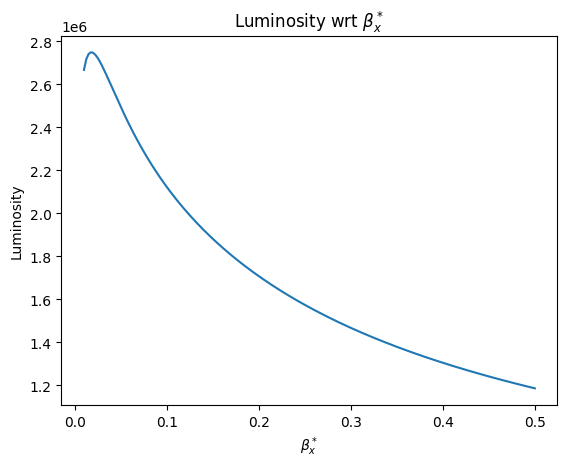

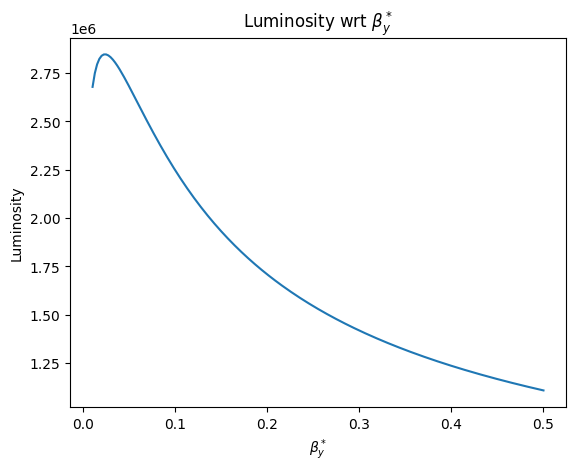

In [45]:
B_star_x = np.linspace(0.01, .5, N + 1)
B_star_y = np.linspace(0.01, .5, N + 1)
Luminosities_b_star_x = np.zeros(N + 1)
Luminosities_b_star_y = np.zeros(N + 1)
Luminosity_int_b_star = (lambda f, N1, N2, ssx, ssy, bsx, bsy, ex, ey, sz, phi, a, b: 
                        integrate.quad(Integrand_b_star, a, b, 
                        args = (f, N1, N2, ssx, ssy, bsx, bsy, ex, ey, sz, phi))[0])
for i, bsx in enumerate(B_star_x):
    Luminosities_b_star_x[i] = Luminosity_int_b_star(f, N1, N2, s_star_x, s_star_y, bsx, b_star_y, 
                                                     ex, ey, sz, phi, low_bound, hi_bound)
for i, bsy in enumerate(B_star_y):
    Luminosities_b_star_y[i] = Luminosity_int_b_star(f, N1, N2, s_star_x, s_star_y, b_star_x, bsy, 
                                                     ex, ey, sz, phi, low_bound, hi_bound)
plt.plot(B_star_x, Luminosities_b_star_x)
plt.title(r"Luminosity wrt $\beta_x^*$")
plt.ylabel("Luminosity")
plt.xlabel(r"$\beta_x^*$")
plt.show()

plt.plot(B_star_y, Luminosities_b_star_y)
plt.title(r"Luminosity wrt $\beta_y^*$")
plt.ylabel("Luminosity")
plt.xlabel(r"$\beta_y^*$")
plt.show()

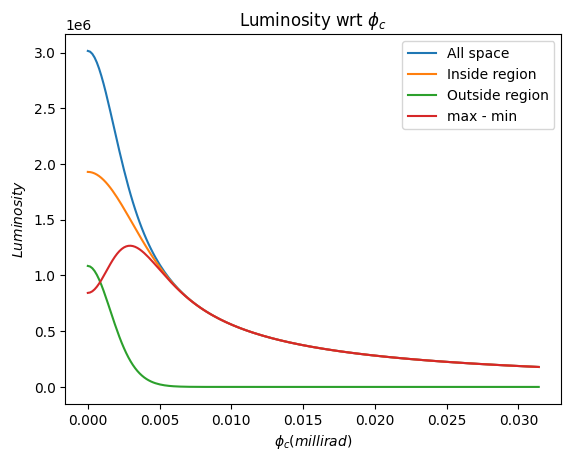

In [46]:
Phi = np.linspace(0, np.pi/100, N + 1)
L_1_plotphi = np.zeros(N + 1)
L_0_plotphi = np.zeros(N + 1)
for i, p in enumerate(Phi):
    L_1_plotphi[i] = Luminosity_int_b_star(f, N1, N2, s_star_x, s_star_y, b_star_x, b_star_y, 
                                                     ex, ey, sz, p, low_bound, hi_bound)
    L_0_plotphi[i] = Luminosity_int_b_star(f, N1, N2, s_star_x, s_star_y, b_star_x, b_star_y, 
                                                     ex, ey, sz, p, neg_inf, pos_inf)

plt.plot(Phi, L_0_plotphi, label = "All space")
plt.plot(Phi, L_1_plotphi, label = "Inside region")
plt.plot(Phi, L_0_plotphi - L_1_plotphi, label = "Outside region")

curve_phi = L_1_plotphi - (L_0_plotphi - L_1_plotphi)
plt.plot(Phi, curve_phi, label = "max - min")
plt.title(r"Luminosity wrt $\phi_c$")
plt.ylabel(r"$Luminosity$")
plt.xlabel(r"$\phi_c  (millirad)$")
plt.legend()
plt.show()